# CCA: Canonical Correlation Analysis

In [267]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [268]:
#load the SST anomalies (processed data from last tutorial)
calcofi_data = pd.read_csv('Datasets/calcofi_combined.csv')
calcofi_data = calcofi_data.dropna(subset=['T_degC'])

# Calculate the percentage of NaN values per column, formatted to 2 decimals and in percentage format
na_percentage = (calcofi_data.isna().mean() * 100).round(2)

# Display the results in percentage format
na_percentage = na_percentage.apply(lambda x: f"{x:.2f}%")

# Print the results
print('Missing Values per Column (in %)')
print(na_percentage)

Missing Values per Column (in %)
Cst_Cnt         0.00%
Sta_ID          0.00%
ChlorA          0.00%
Phaeop          0.00%
T_degC          0.00%
Salnty          0.56%
O2ml_L          0.61%
PO4uM           4.39%
SiO3uM          3.95%
NO3uM           4.06%
Depthm          0.00%
Date            0.00%
Year            0.00%
Month           0.00%
Julian_Day      0.00%
Lat_Dec         0.00%
Lon_Dec         0.00%
Julian_Date     0.00%
Wind_Spd        2.24%
Wave_Ht        43.42%
Dry_T           2.14%
Wave_Prd       44.11%
Barometer       2.18%
dtype: object


In [269]:
# Extract characters from position 7 to 10 of the Sta_ID column
calcofi_data['Sta_ID_prefix'] = calcofi_data['Sta_ID'].astype(str).str[6:9]

# Count unique values in the extracted prefixes
unique_sta_id_prefix_count = calcofi_data['Sta_ID_prefix'].nunique()

# Print the count of unique values based on the extracted digits
print("Count of unique Station values based on the extracted 3 digits (positions 7 to 10):", unique_sta_id_prefix_count)

Count of unique Station values based on the extracted 3 digits (positions 7 to 10): 103


In [270]:
# Create 3 datasets from calcofi_data

# Create the cal_data dataset
cal_data = calcofi_data[['Date', 'Sta_ID_prefix', 'ChlorA']]

# Create the temp_data dataset
temp_data = calcofi_data[['Date', 'Sta_ID_prefix', 'T_degC']]

# Create the depth_data dataset
depth_data = calcofi_data[['Date', 'Sta_ID_prefix', 'Depthm']]

# Create the depth_data dataset
nutrient = 'O2ml_L'
nutrient_data = calcofi_data[['Date', 'Sta_ID_prefix', nutrient]]


In [271]:
cal_data.head()

,Date,Sta_ID_prefix,ChlorA
0,1973-03-08,035,0.650000
1,1973-03-10,008,2.483333
2,1973-03-10,008,0.240000
3,1973-03-11,010,2.425000
4,1973-03-12,009,5.540909


/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/2426582485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_data['Date'] = pd.to_datetime(cal_data['Date'], errors='coerce')


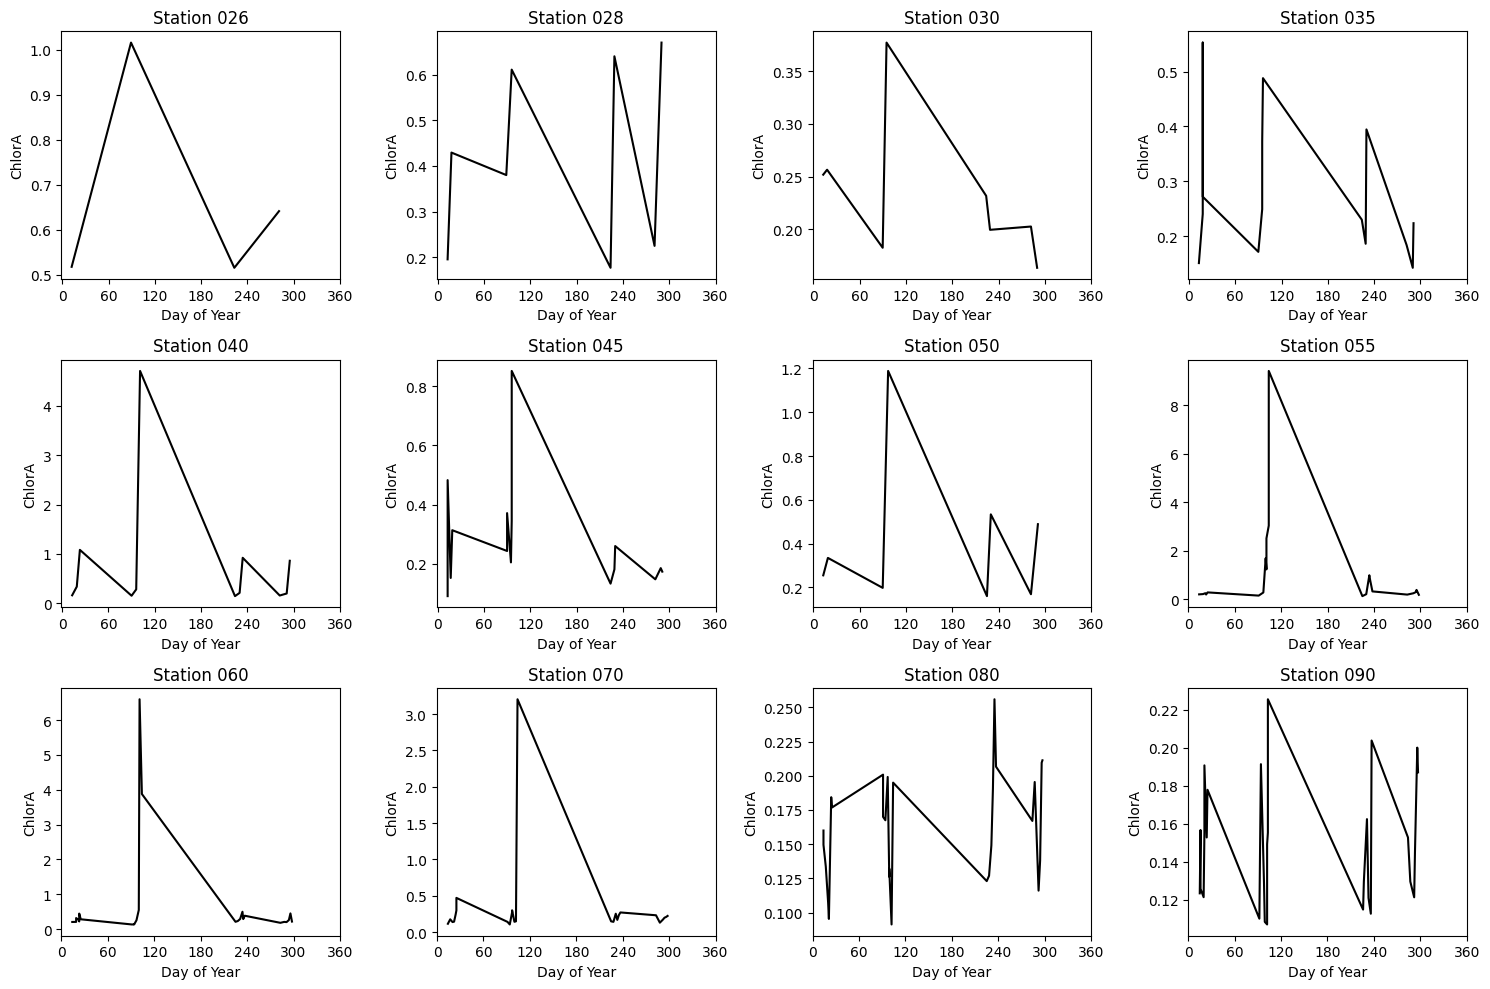

In [272]:
# Ensure the Date column is properly converted to datetime format
cal_data['Date'] = pd.to_datetime(cal_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if cal_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter cal_data for entries from the year 1993
cal_data_1993 = cal_data[cal_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = cal_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = cal_data_1993[cal_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot ChlorA data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data['ChlorA'], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel("ChlorA")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/2862958469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['Date'] = pd.to_datetime(temp_data['Date'], errors='coerce')


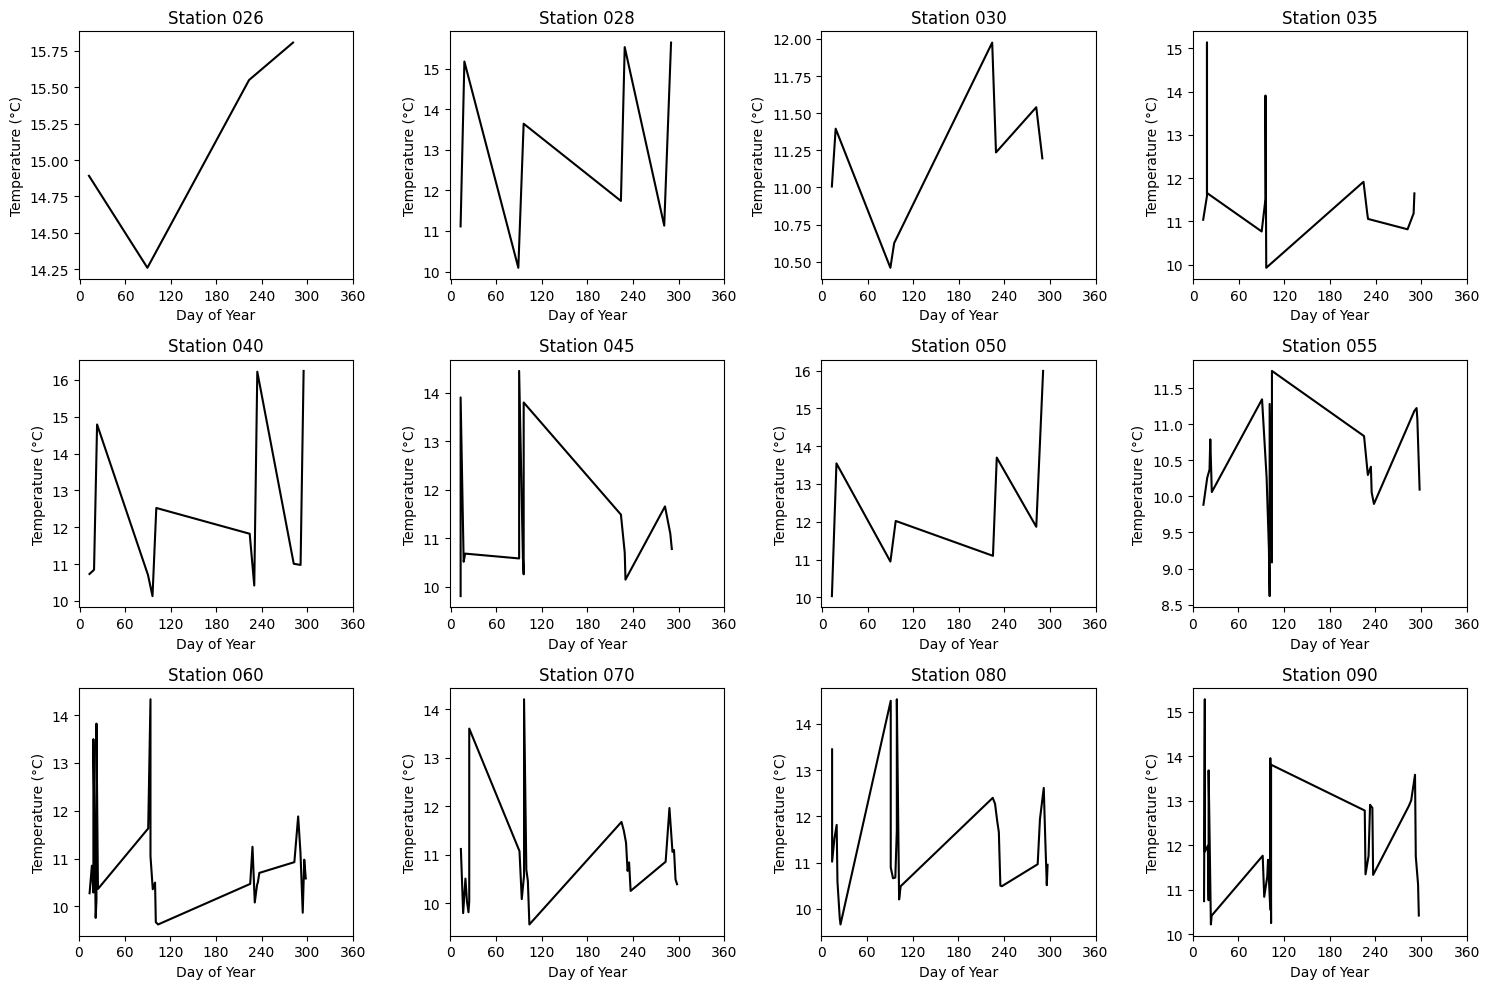

In [273]:
# Ensure the Date column is properly converted to datetime format
temp_data['Date'] = pd.to_datetime(temp_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if temp_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter temp_data for entries from the year 1993
temp_data_1993 = temp_data[temp_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = temp_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = temp_data_1993[temp_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot T_degC data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data['T_degC'], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel("Temperature (°C)")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/2356021056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depth_data['Date'] = pd.to_datetime(depth_data['Date'], errors='coerce')


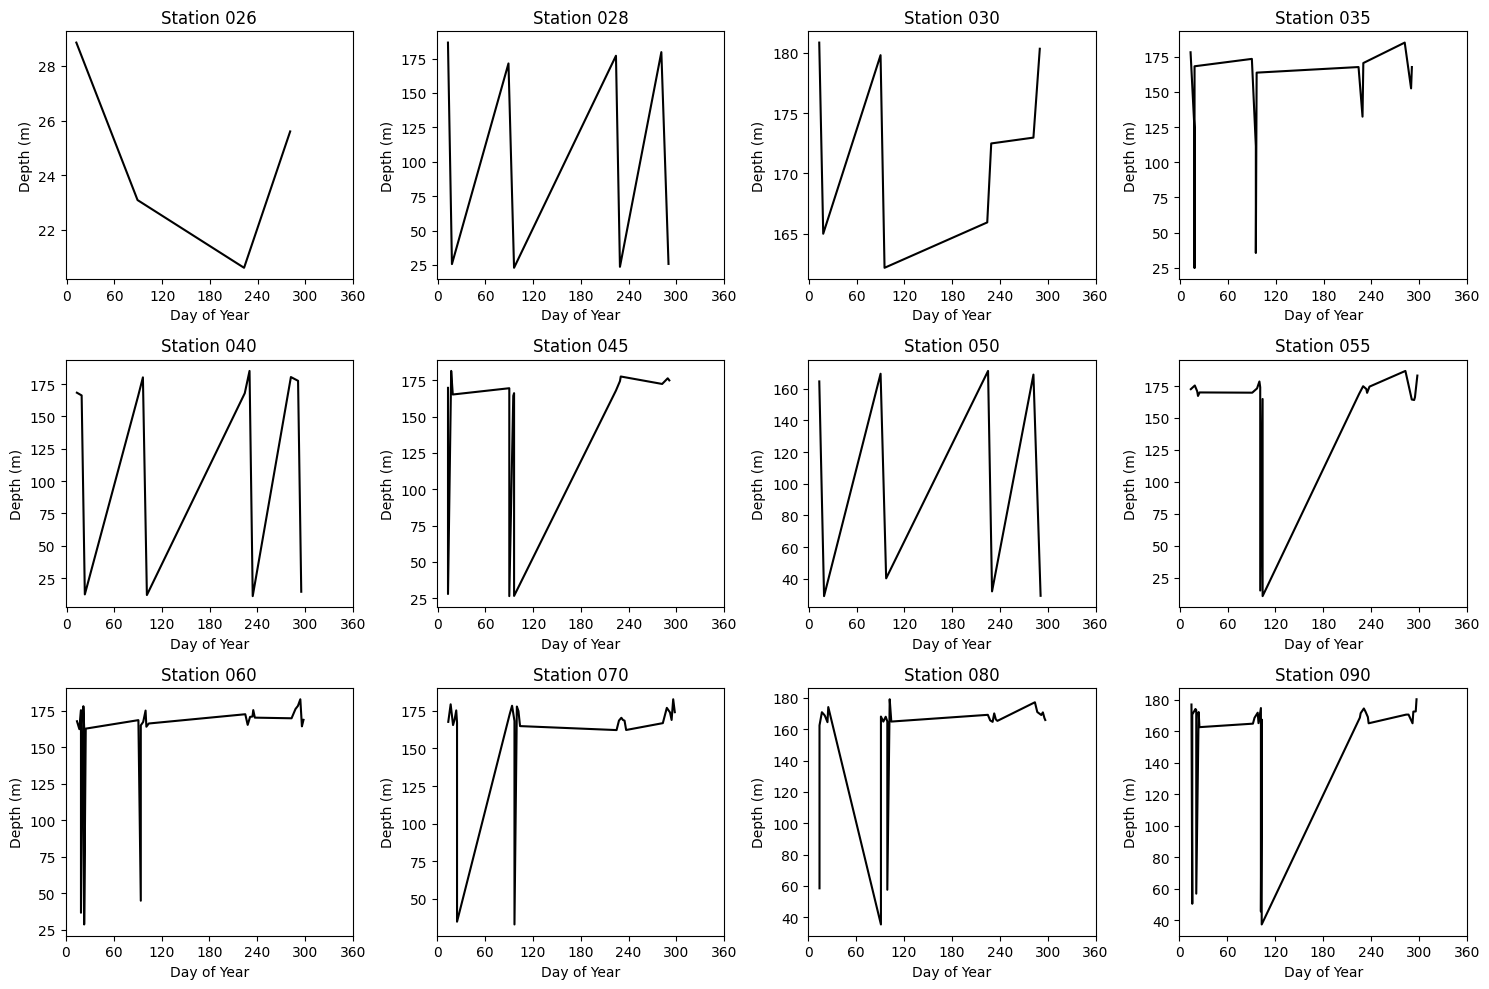

In [274]:
# Ensure the Date column is properly converted to datetime format
depth_data['Date'] = pd.to_datetime(depth_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if depth_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter depth_data for entries from the year 1993
depth_data_1993 = depth_data[depth_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = depth_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = depth_data_1993[depth_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot Depthm data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data['Depthm'], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel("Depth (m)")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/1405587863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrient_data['Date'] = pd.to_datetime(nutrient_data['Date'], errors='coerce')


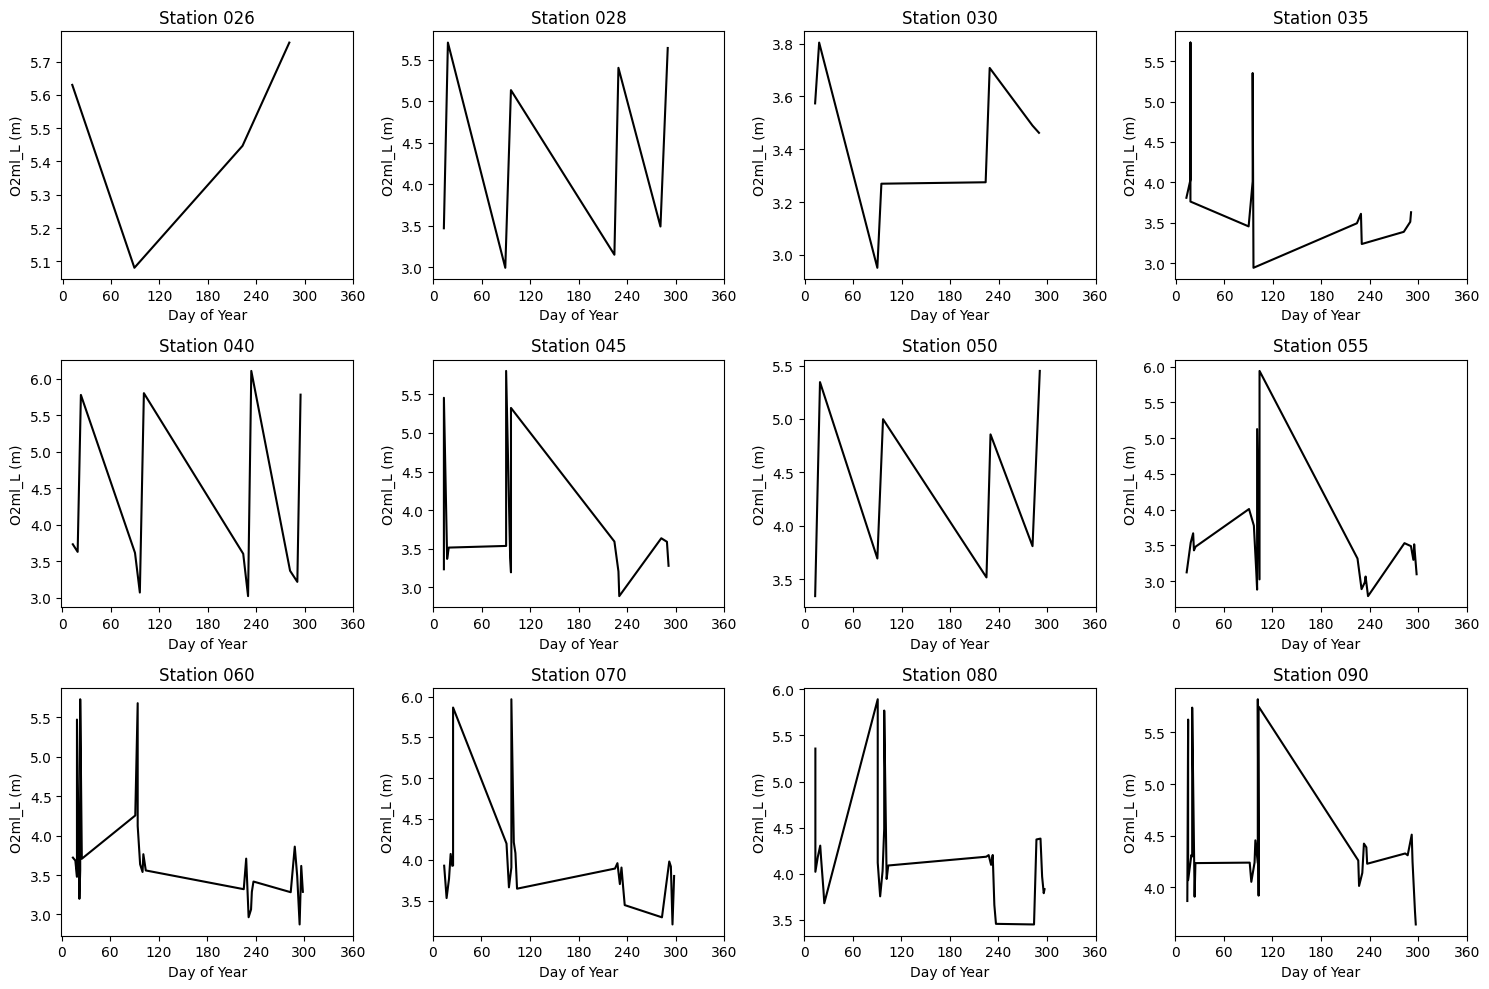

In [275]:
# Ensure the Date column is properly converted to datetime format
nutrient_data['Date'] = pd.to_datetime(nutrient_data['Date'], errors='coerce')

# Check for any non-datetime values that were converted to NaT
if nutrient_data['Date'].isna().any():
    print("Warning: There are invalid dates in the Date column. They have been converted to NaT.")

# Filter depth_data for entries from the year 1993
nutrient_data_1993 = nutrient_data[nutrient_data['Date'].dt.year == 1993]

# Select the first 12 unique stations that have data in 1993
first_12_stations = nutrient_data_1993['Sta_ID_prefix'].unique()[:12]
data_first_12_stations = nutrient_data_1993[nutrient_data_1993['Sta_ID_prefix'].isin(first_12_stations)]

# Create the plot
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

# Plot Depthm data for each of the first 12 stations
for i, station in enumerate(first_12_stations):
    station_data = data_first_12_stations[data_first_12_stations['Sta_ID_prefix'] == station]
    
    # Verify there is data to plot for the station
    if not station_data.empty:
        # Use .assign() to avoid the warning
        station_data = station_data.assign(DayOfYear=station_data['Date'].dt.dayofyear)
        ax[i].plot(station_data['DayOfYear'], station_data[nutrient], c="k")
        ax[i].set_title(f"Station {station}")
        ax[i].set_xlabel("Day of Year")
        ax[i].set_ylabel(f"{nutrient} (m)")
        ax[i].set_xticks(range(0, 366, 60))  # Set intervals for every 60 days for longer spacing
    
plt.tight_layout()
plt.show()

## CCA Results per Station

In [276]:
# Reduce the Date to month-year format and take the average for each month
cal_data['MonthYear'] = cal_data['Date'].dt.to_period('M')
temp_data['MonthYear'] = temp_data['Date'].dt.to_period('M')
depth_data['MonthYear'] = depth_data['Date'].dt.to_period('M')
nutrient_data['MonthYear'] = nutrient_data['Date'].dt.to_period('M')

# Group by MonthYear and Sta_ID_prefix, then average the data
cal_data = cal_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()
temp_data = temp_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()
depth_data = depth_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()
nutrient_data = nutrient_data.groupby(['MonthYear', 'Sta_ID_prefix']).mean().reset_index()

# Pivot the datasets with MonthYear as the index
cal_data_pivot = cal_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values='ChlorA')
temp_data_pivot = temp_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values='T_degC')
depth_data_pivot = depth_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values='Depthm')
nutrient_data_pivot = nutrient_data.pivot(index='MonthYear', columns='Sta_ID_prefix', values=nutrient)

/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/849152873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal_data['MonthYear'] = cal_data['Date'].dt.to_period('M')
/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/849152873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['MonthYear'] = temp_data['Date'].dt.to_period('M')
/var/folders/pp/y5y2qg9j3hj_2v8_lfh8f_n40000gn/T/ipykernel_46992/849152873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

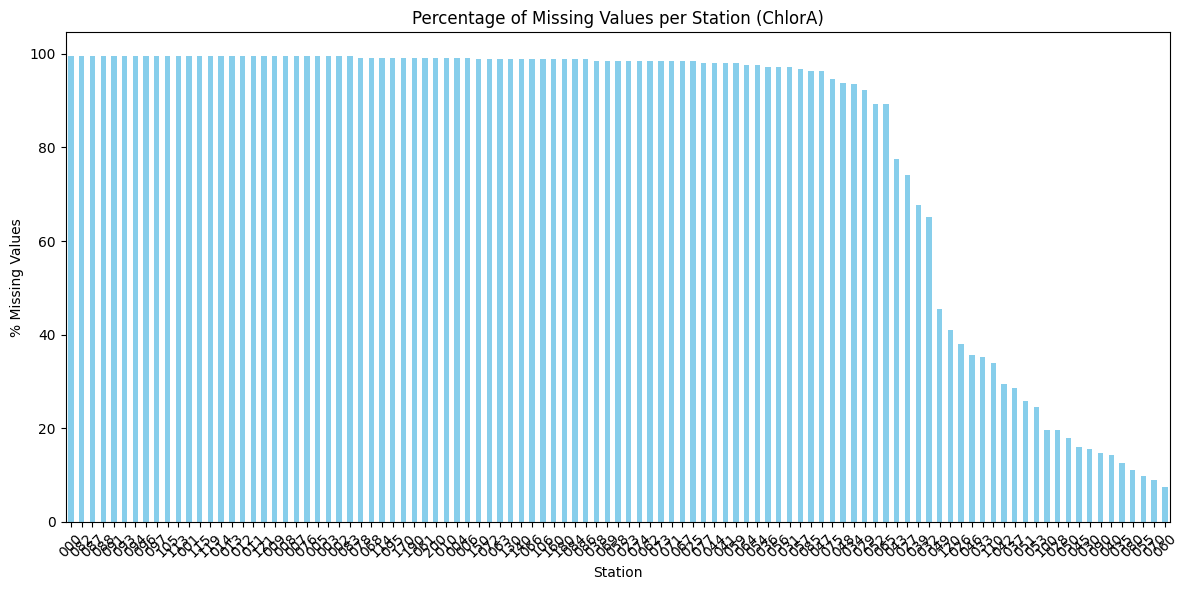

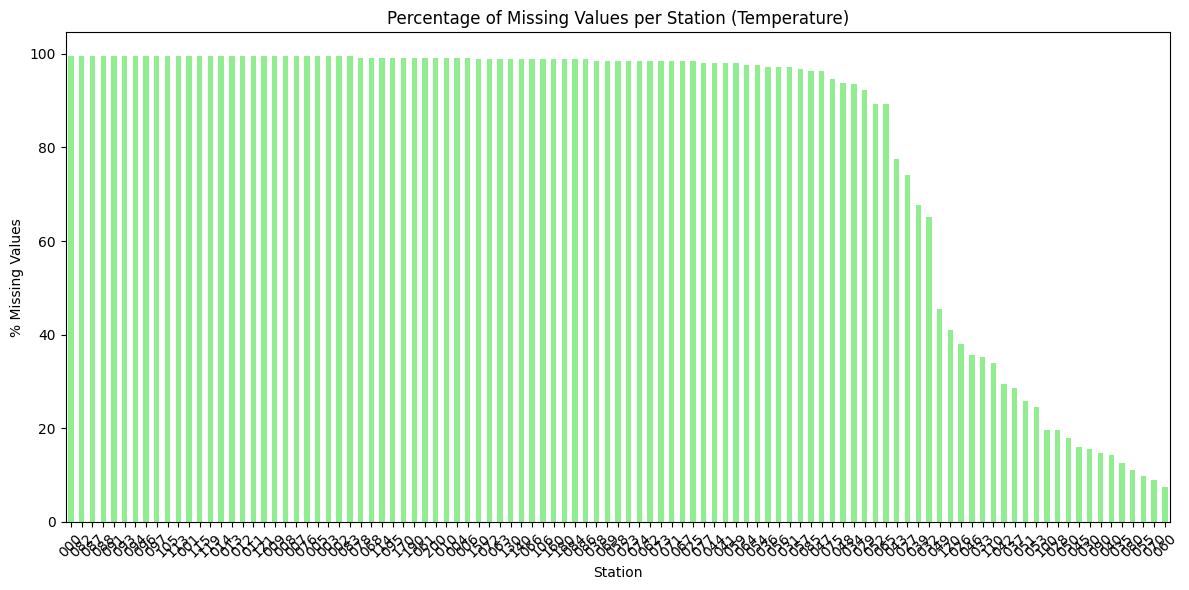

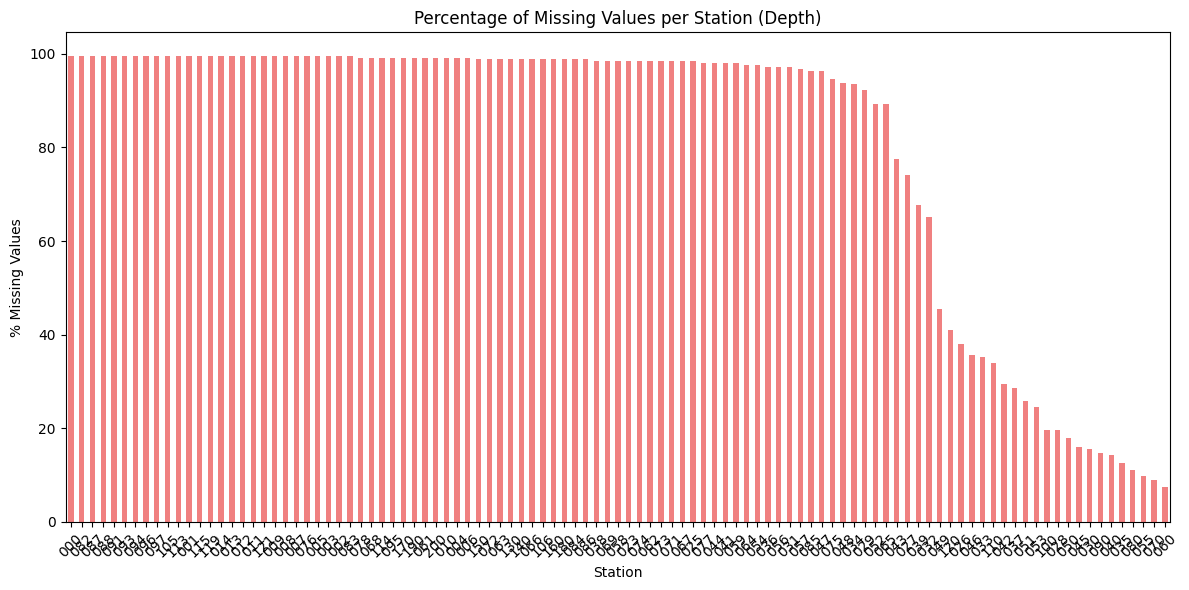

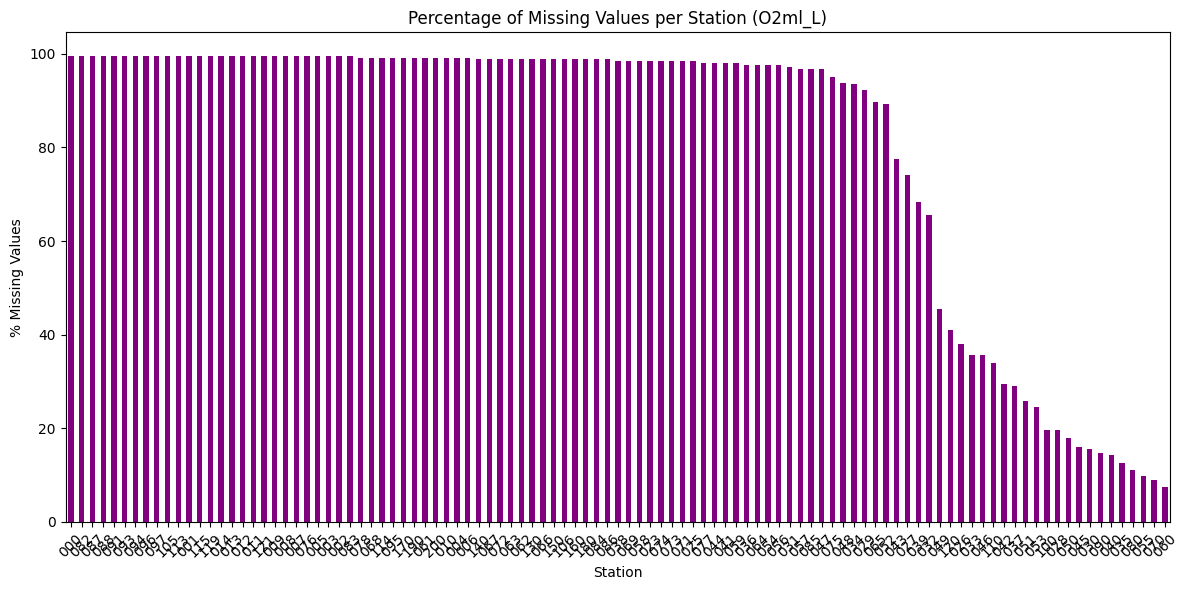

In [277]:
# Calculate the percentage of missing values per station for each dataset
cal_data_missing = cal_data_pivot.isnull().mean() * 100
temp_data_missing = temp_data_pivot.isnull().mean() * 100
depth_data_missing = depth_data_pivot.isnull().mean() * 100
nutrient_data_missing = nutrient_data_pivot.isnull().mean() * 100

# Sort the missing values from max to min for each dataset
cal_data_missing_sorted = cal_data_missing.sort_values(ascending=False)
temp_data_missing_sorted = temp_data_missing.sort_values(ascending=False)
depth_data_missing_sorted = depth_data_missing.sort_values(ascending=False)
nutrient_data_missing_sorted = nutrient_data_missing.sort_values(ascending=False)

# Plot for cal_data
plt.figure(figsize=(12, 6))
cal_data_missing_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values per Station (ChlorA)')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for temp_data
plt.figure(figsize=(12, 6))
temp_data_missing_sorted.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Missing Values per Station (Temperature)')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for depth_data
plt.figure(figsize=(12, 6))
depth_data_missing_sorted.plot(kind='bar', color='lightcoral')
plt.title('Percentage of Missing Values per Station (Depth)')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for nutrient
plt.figure(figsize=(12, 6))
nutrient_data_missing_sorted.plot(kind='bar', color='purple')
plt.title(f'Percentage of Missing Values per Station ({nutrient})')
plt.xlabel('Station')
plt.ylabel('% Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [278]:
# Threshold for removing stations
threshold = 40  # 40% missing values

# Identify stations to keep (those with <= 40% missing values)
stations_to_keep_cal = cal_data_missing[cal_data_missing <= threshold].index
stations_to_keep_temp = temp_data_missing[temp_data_missing <= threshold].index
stations_to_keep_depth = depth_data_missing[depth_data_missing <= threshold].index
stations_to_keep_nutrient = nutrient_data_missing[nutrient_data_missing <= threshold].index

# Filter the pivoted DataFrames to keep only these stations
cal_data_pivot = cal_data_pivot[stations_to_keep_cal]
temp_data_pivot = temp_data_pivot[stations_to_keep_temp]
depth_data_pivot = depth_data_pivot[stations_to_keep_depth]
nutrient_data_pivot = nutrient_data_pivot[stations_to_keep_depth]

# Drop rows with missing values in the remaining data
cal_data_pivot = cal_data_pivot.dropna()
temp_data_pivot = temp_data_pivot.dropna()
depth_data_pivot = depth_data_pivot.dropna()
nutrient_data_pivot = nutrient_data_pivot.dropna()

In [279]:
cal_data_pivot.tail()

Sta_ID_prefix,026,028,030,033,035,037,040,042,045,046,050,051,053,055,060,070,080,090,100,110
MonthYear,,,,,,,,,,,,,,,,,,,,
2019-11,1.641785,0.599906,0.393537,0.864375,0.463315,0.240000,0.636642,0.496800,0.274980,0.554333,0.965579,0.827602,0.196762,0.308045,0.272451,0.295149,0.300766,0.181720,0.150919,0.143968
2020-01,1.216333,0.165215,0.266589,0.138625,0.166785,0.070278,0.337857,0.401615,0.227556,0.285529,1.353902,1.001752,0.618550,0.619062,0.456698,0.358941,0.280043,0.220164,0.189404,0.127611
2020-07,3.384181,1.199042,2.065978,1.713833,2.162046,0.411421,1.006447,3.727133,0.906757,1.636789,1.466500,1.873763,0.800952,0.890151,0.416712,0.228521,0.214866,0.154124,0.129112,0.140267
2020-10,0.947500,0.505938,0.944066,0.631444,0.459057,0.380533,0.433849,0.425714,0.316648,0.409706,1.028344,0.828866,0.184312,0.257507,0.196163,0.220897,0.152871,0.144500,0.152594,0.144270
2021-01,1.939429,0.838476,1.021351,1.334167,0.429688,0.170647,0.381491,0.520538,0.387288,0.784214,0.830548,1.271205,0.219750,0.385750,0.256212,0.246526,0.222666,0.219382,0.217530,0.152417


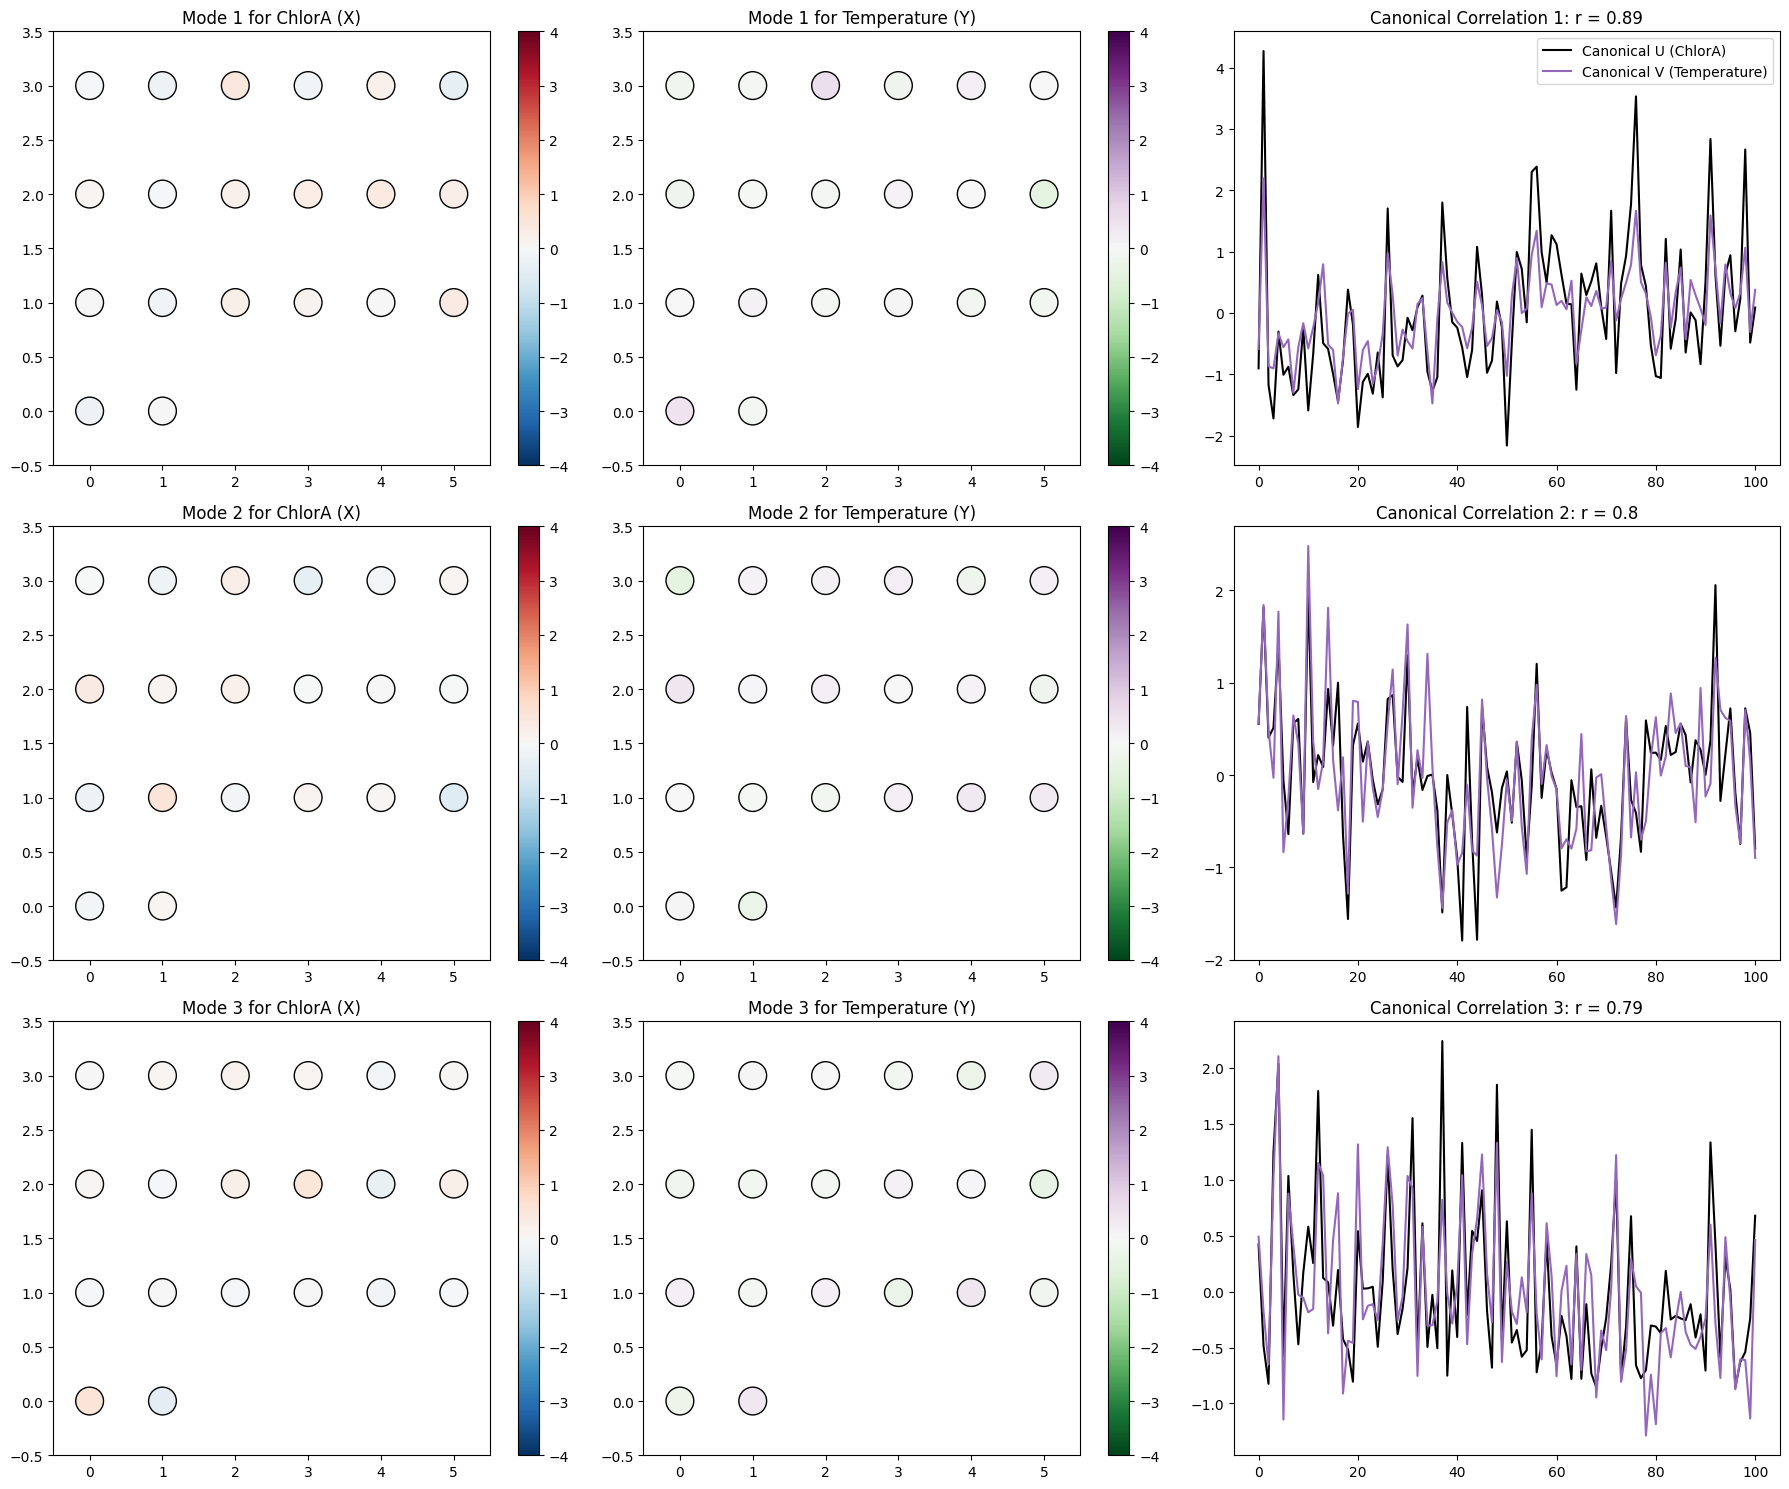

In [280]:
# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(temp_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(temp_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
temp_data_aligned = temp_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
temp_data_aligned = temp_data_aligned.dropna()

# Convert to numpy arrays for CCA
X = cal_data_aligned.values
Y = temp_data_aligned.values

# Perform CCA with a suitable number of components
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
U, V = cca.fit_transform(X, Y)

# Prepare to plot up to 6 modes or as many as available
n_modes = min(3, n_components)
fig, ax = plt.subplots(n_modes, 3, figsize=(18, 5 * n_modes))

for i in range(n_modes):
    # Plot X mode vector (A)
    out = ax[i, 0].scatter(
        np.arange(X.shape[1]) % 6,  # Set a 4x6 grid layout for the 22 stations
        3 - np.arange(X.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector (B)
    out = ax[i, 1].scatter(
        np.arange(Y.shape[1]) % 6,
        3 - np.arange(Y.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for Temperature (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot U and V (canonical variables)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label="Canonical V (Temperature)", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

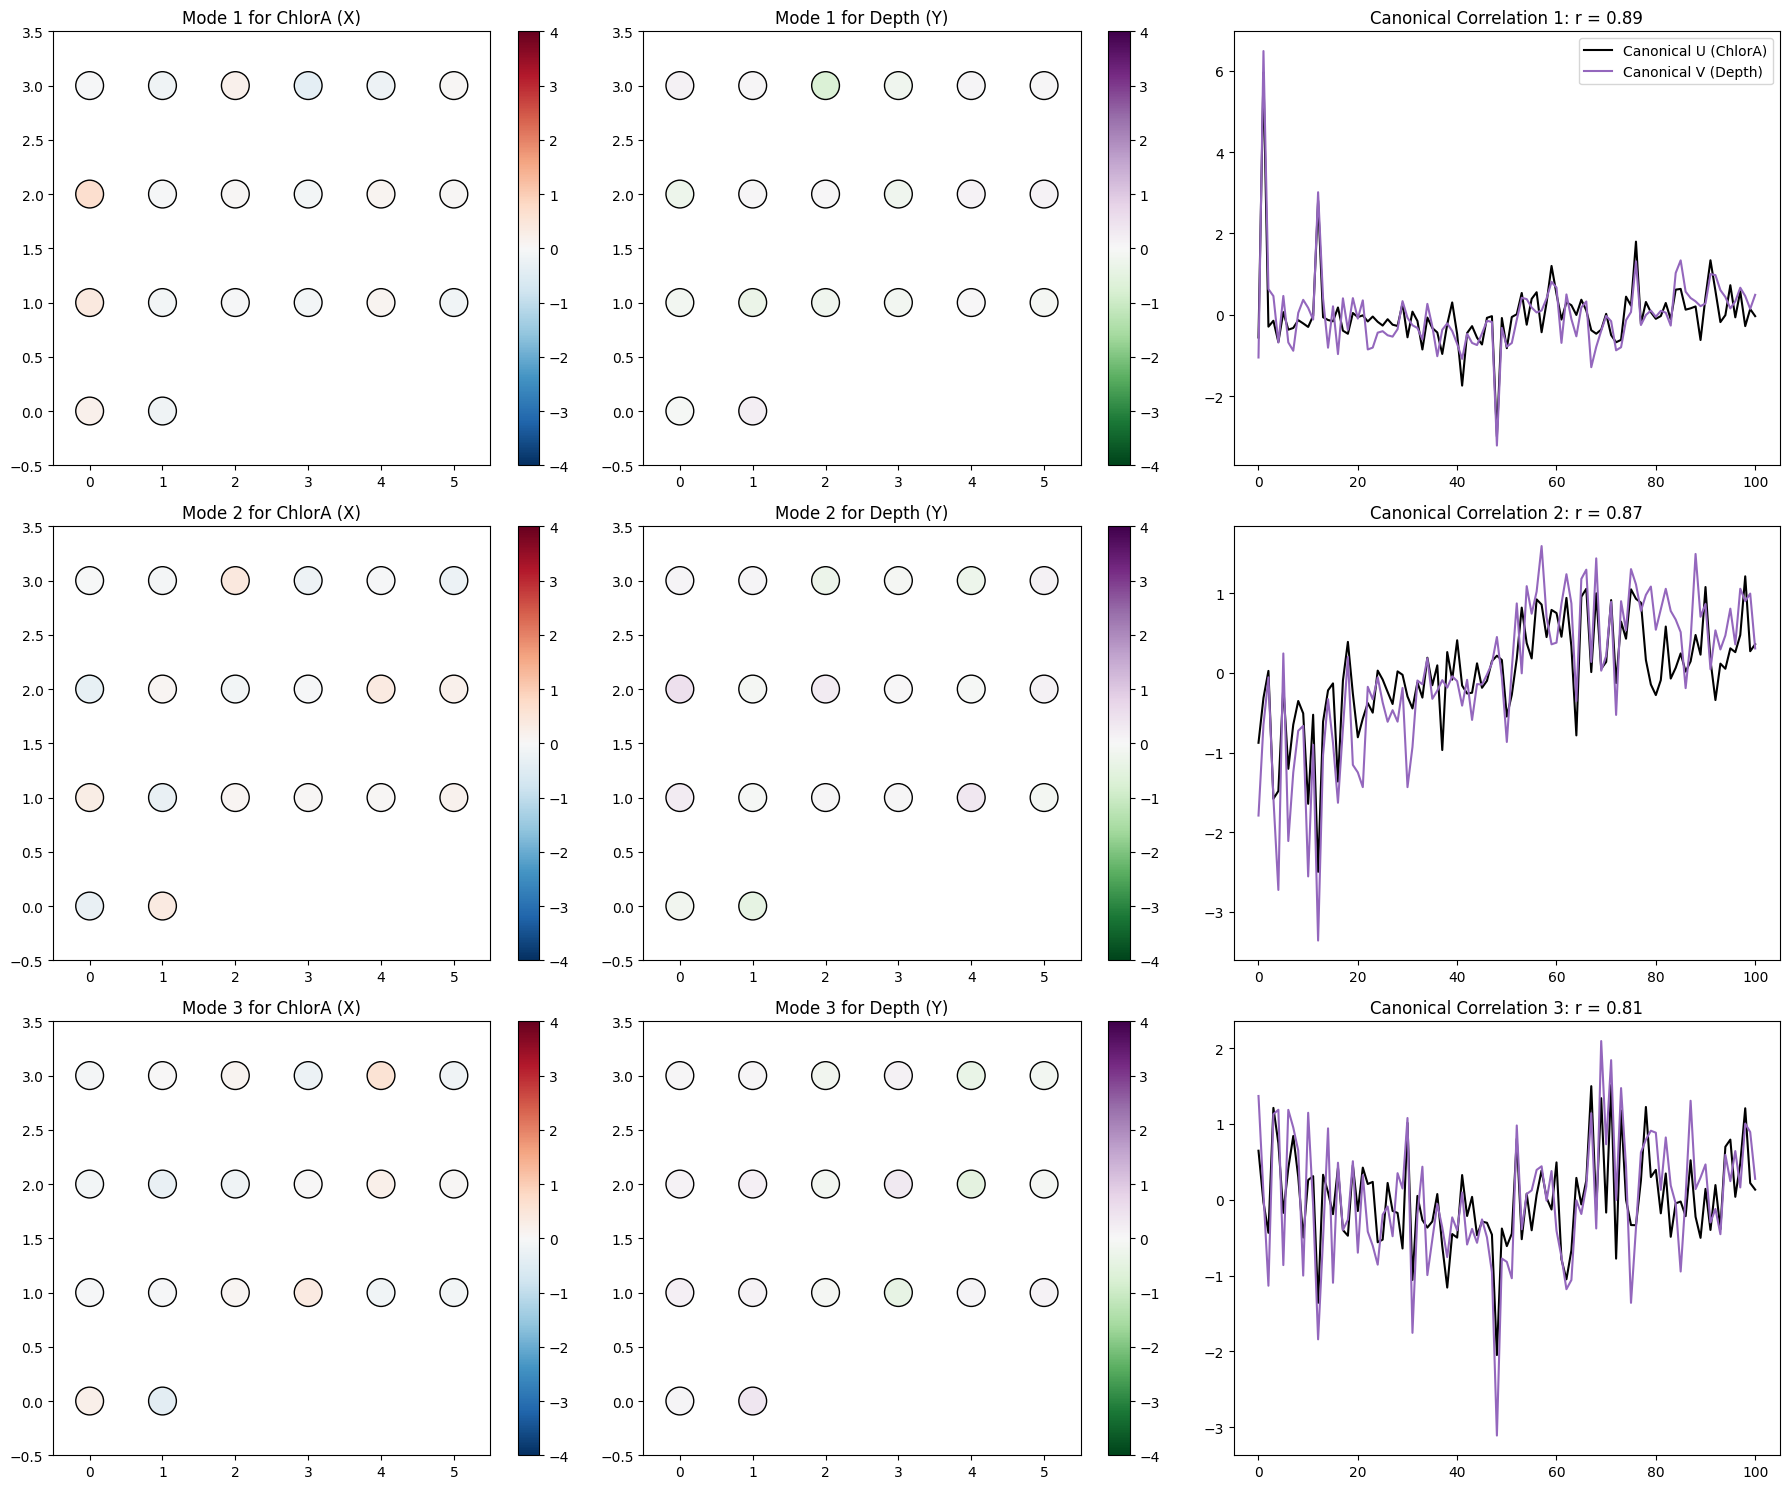

In [281]:
# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(depth_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(depth_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
depth_data_aligned = depth_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
depth_data_aligned = depth_data_aligned.dropna()

# Convert to numpy arrays for CCA
X = cal_data_aligned.values
Y = depth_data_aligned.values

# Perform CCA with a suitable number of components
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
U, V = cca.fit_transform(X, Y)

# Prepare to plot up to 6 modes or as many as available
n_modes = min(3, n_components)
fig, ax = plt.subplots(n_modes, 3, figsize=(18, 5 * n_modes))

for i in range(n_modes):
    # Plot X mode vector (A)
    out = ax[i, 0].scatter(
        np.arange(X.shape[1]) % 6,  # Set a 4x6 grid layout for the 22 stations
        3 - np.arange(X.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector (B)
    out = ax[i, 1].scatter(
        np.arange(Y.shape[1]) % 6,
        3 - np.arange(Y.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for Depth (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot U and V (canonical variables)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label="Canonical V (Depth)", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

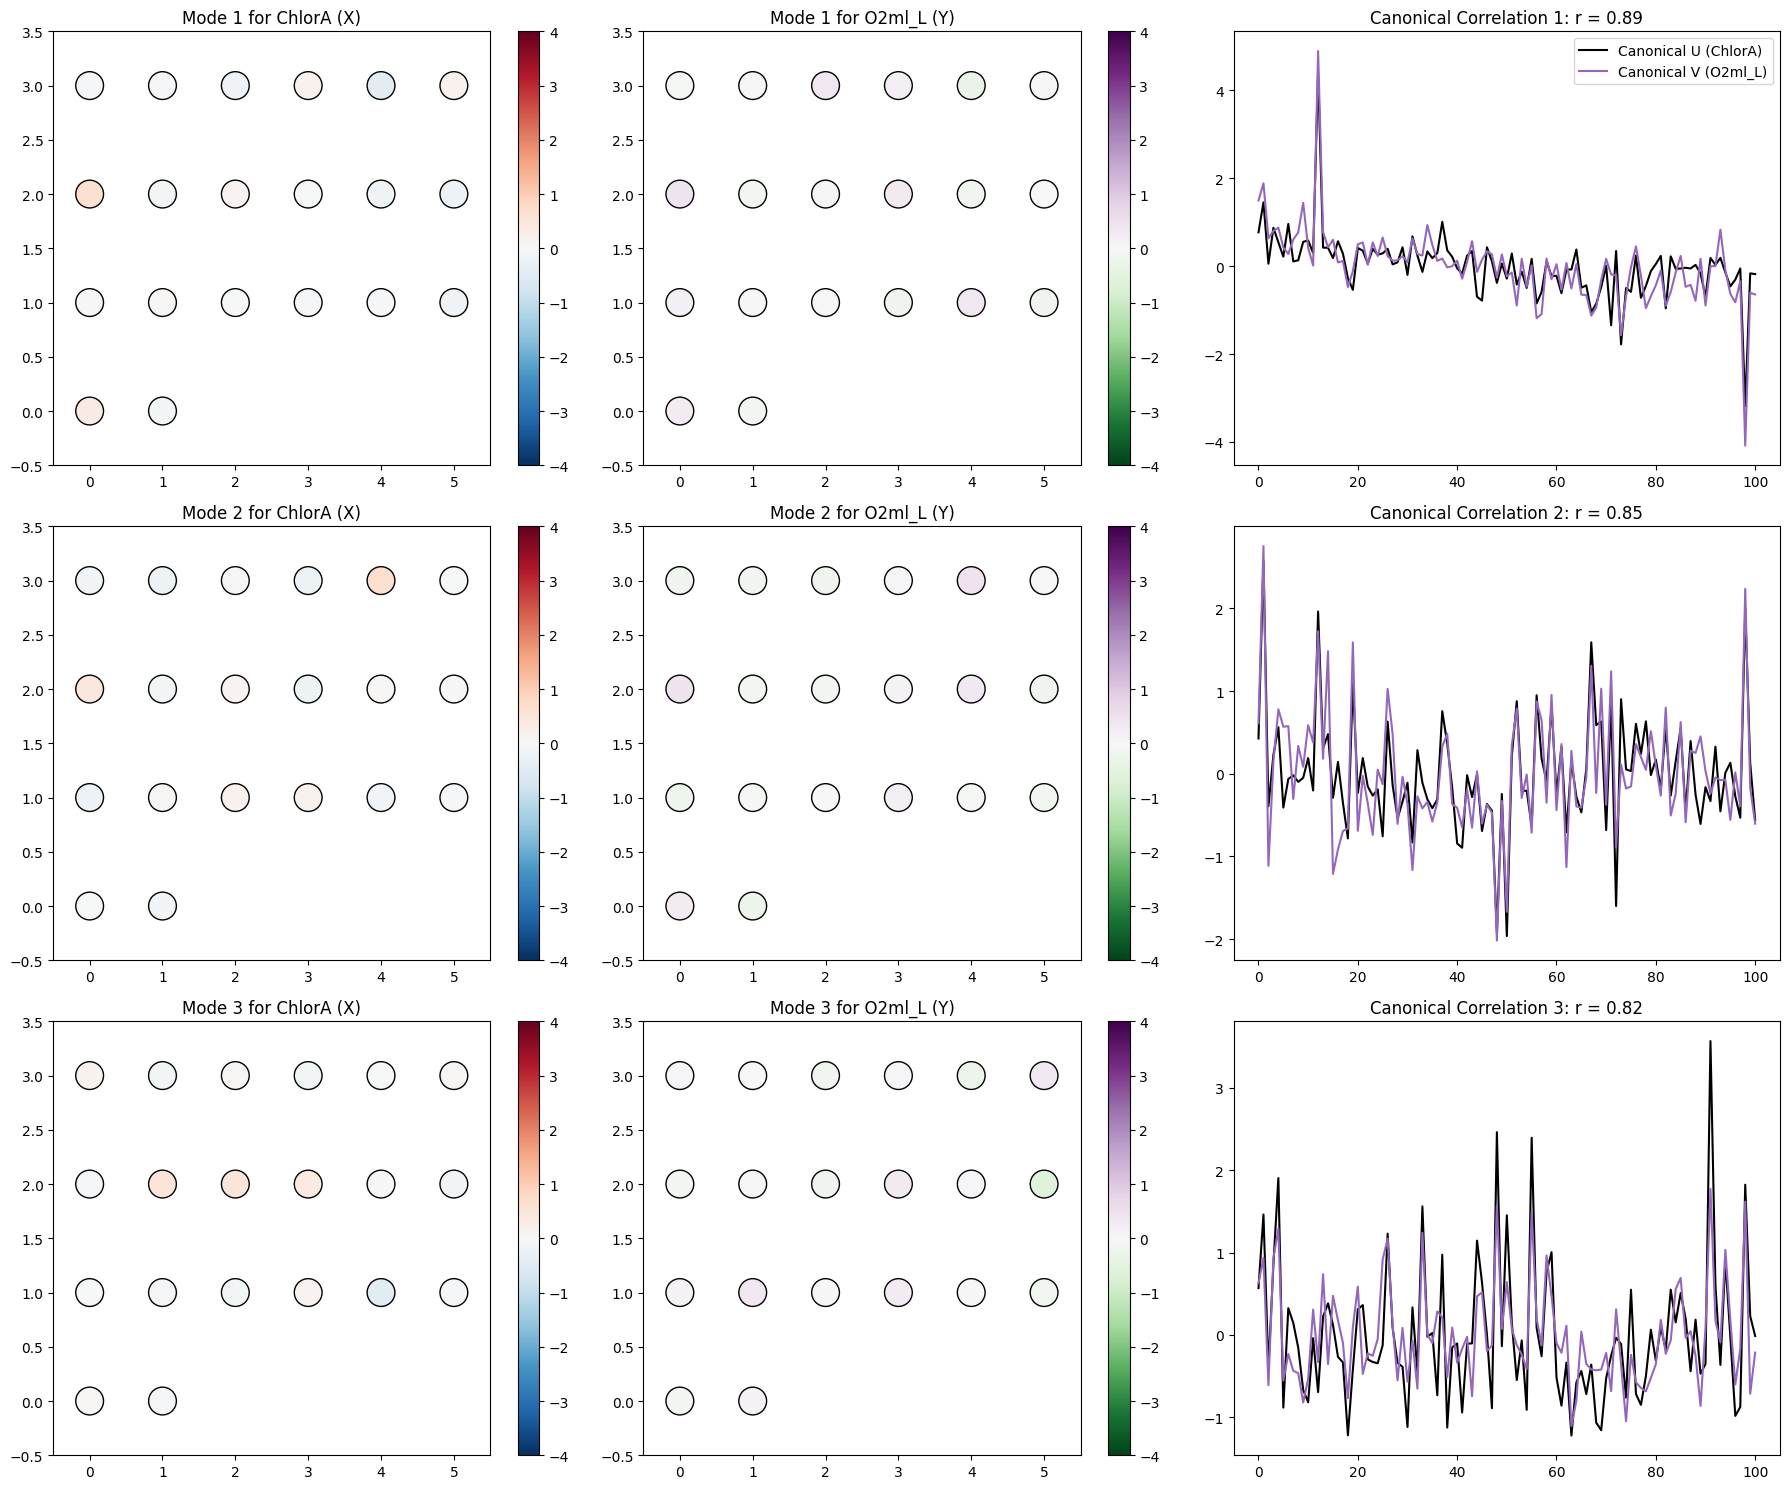

In [283]:
# Align the DataFrames so they have the same index and columns
common_index = cal_data_pivot.index.intersection(nutrient_data_pivot.index)
common_columns = cal_data_pivot.columns.intersection(nutrient_data_pivot.columns)

cal_data_aligned = cal_data_pivot.loc[common_index, common_columns]
nutrient_data_aligned = nutrient_data_pivot.loc[common_index, common_columns]

# Ensure data is aligned and contains no missing values
cal_data_aligned = cal_data_aligned.dropna()
nutrient_data_aligned = nutrient_data_aligned.dropna()

# Standardize the data
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X = scaler_X.fit_transform(cal_data_aligned.values)
Y = scaler_Y.fit_transform(nutrient_data_aligned.values)

# Perform CCA with a suitable number of components
n_components = min(X.shape[1], Y.shape[1])
cca = CCA(n_components=n_components)
U, V = cca.fit_transform(X, Y)

# Prepare to plot up to 6 modes or as many as available
n_modes = min(3, n_components)
fig, ax = plt.subplots(n_modes, 3, figsize=(18, 5 * n_modes))

for i in range(n_modes):
    # Plot X mode vector (A)
    out = ax[i, 0].scatter(
        np.arange(X.shape[1]) % 6,  # Set a 4x6 grid layout for the 22 stations
        3 - np.arange(X.shape[1]) // 6,
        c=cca.x_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="RdBu_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 0].set_ylim(-0.5, 3.5)
    ax[i, 0].set_xlim(-0.5, 5.5)
    ax[i, 0].set_title(f"Mode {i+1} for ChlorA (X)")
    plt.colorbar(out, ax=ax[i, 0])

    # Plot Y mode vector (B)
    out = ax[i, 1].scatter(
        np.arange(Y.shape[1]) % 6,
        3 - np.arange(Y.shape[1]) // 6,
        c=cca.y_weights_[:, i],
        s=400,  # Adjust the size of the circles as needed
        cmap="PRGn_r",
        edgecolors="k",
        vmin=-4,
        vmax=4
    )
    ax[i, 1].set_ylim(-0.5, 3.5)
    ax[i, 1].set_xlim(-0.5, 5.5)
    ax[i, 1].set_title(f"Mode {i+1} for {nutrient} (Y)")
    plt.colorbar(out, ax=ax[i, 1])

    # Plot U and V (canonical variables)
    ax[i, 2].plot(U[:, i], label="Canonical U (ChlorA)", c="k")
    ax[i, 2].plot(V[:, i], label=f"Canonical V ({nutrient})", c="C4")
    r = np.corrcoef(U[:, i], V[:, i])[0, 1]
    ax[i, 2].set_title(f"Canonical Correlation {i+1}: r = {round(r, 2)}")

    if i == 0:
        ax[i, 2].legend()

plt.tight_layout()
plt.show()

## Overall CCA Results

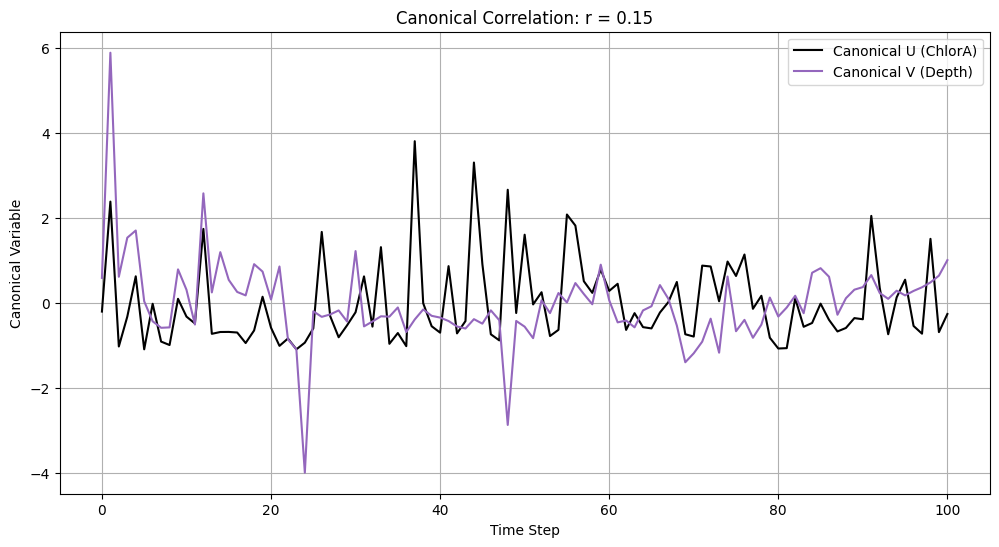

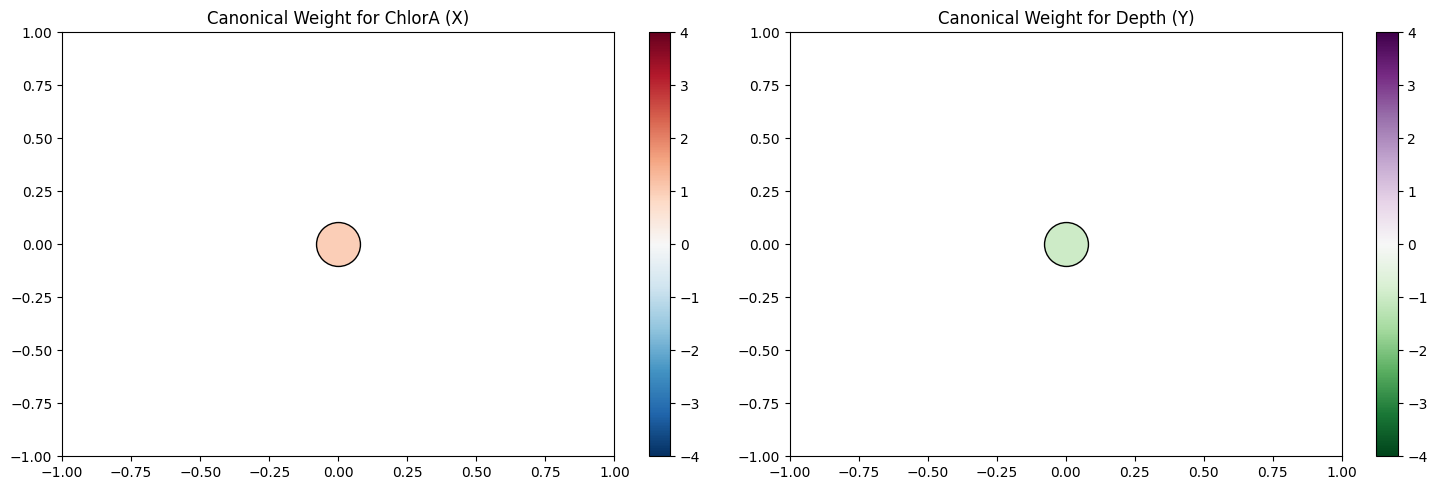

In [ ]:
# Collapse the data by averaging across all stations to create overall time series
cal_data_overall = cal_data_pivot.mean(axis=1)  # Averaging across stations for each time step
depth_data_overall = depth_data_pivot.mean(axis=1)

# Ensure data alignment and drop missing values
combined_data = pd.concat([cal_data_overall, depth_data_overall], axis=1, keys=['ChlorA', 'Depth'])
combined_data = combined_data.dropna()

# Extract values for CCA
X = combined_data['ChlorA'].values.reshape(-1, 1)
Y = combined_data['Depth'].values.reshape(-1, 1)

# Perform CCA
cca = CCA(n_components=1)
U, V = cca.fit_transform(X, Y)

# Plot U and V (canonical variables)
plt.figure(figsize=(12, 6))
plt.plot(U, label="Canonical U (ChlorA)", c="k")
plt.plot(V, label="Canonical V (Depth)", c="C4")
r = np.corrcoef(U[:, 0], V[:, 0])[0, 1]
plt.title(f"Canonical Correlation: r = {round(r, 2)}")
plt.xlabel("Time Step")
plt.ylabel("Canonical Variable")
plt.legend()
plt.grid(True)
plt.show()

# Plot mode vectors as circle plots for the overall effect of the PC on each variable
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot X mode vector (weights)
out = ax[0].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.x_weights_[:, 0],  # Canonical weights for X (ChlorA)
    s=1000,  # Adjust circle size for better visibility
    cmap="RdBu_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[0].set_title("Canonical Weight for ChlorA (X)")
ax[0].set_xlim(-1, 1)
ax[0].set_ylim(-1, 1)
plt.colorbar(out, ax=ax[0])

# Plot Y mode vector (weights)
out = ax[1].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.y_weights_[:, 0],  # Canonical weights for Y (Depth)
    s=1000,  # Adjust circle size for better visibility
    cmap="PRGn_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[1].set_title("Canonical Weight for Depth (Y)")
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
plt.colorbar(out, ax=ax[1])

plt.tight_layout()
plt.show()

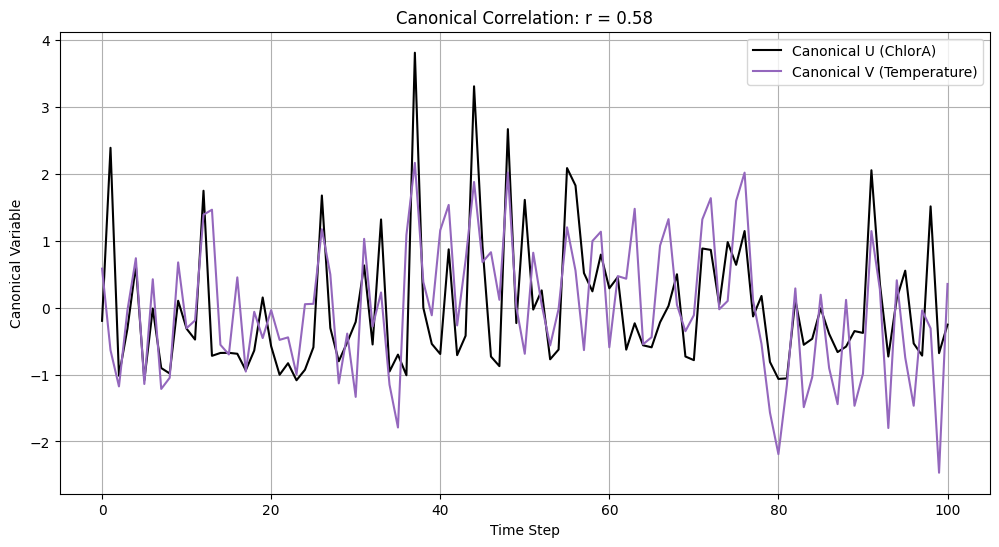

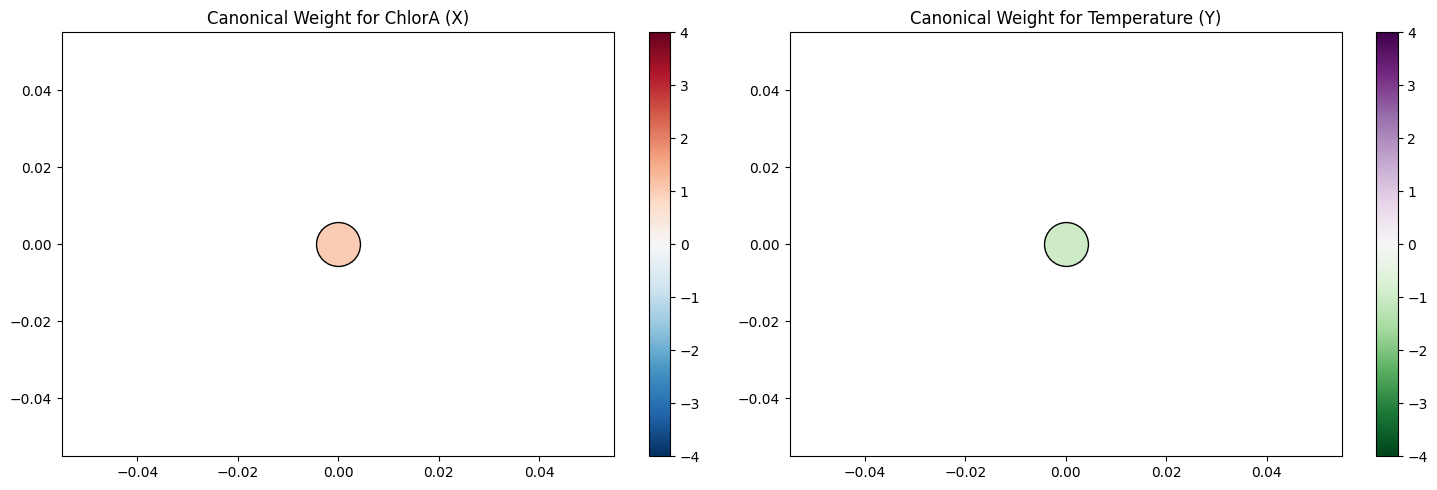

In [ ]:
# Collapse the data by averaging across all stations to create overall time series
cal_data_overall = cal_data_pivot.mean(axis=1)  # Averaging across stations for each time step
temp_data_overall = temp_data_pivot.mean(axis=1)

# Ensure data alignment and drop missing values
combined_data = pd.concat([cal_data_overall, temp_data_overall], axis=1, keys=['ChlorA', 'Temperature'])
combined_data = combined_data.dropna()

# Extract values for CCA
X = combined_data['ChlorA'].values.reshape(-1, 1)
Y = combined_data['Temperature'].values.reshape(-1, 1)

# Perform CCA
cca = CCA(n_components=1)
U, V = cca.fit_transform(X, Y)

# Plot U and V (canonical variables)
plt.figure(figsize=(12, 6))
plt.plot(U, label="Canonical U (ChlorA)", c="k")
plt.plot(V, label="Canonical V (Temperature)", c="C4")
r = np.corrcoef(U[:, 0], V[:, 0])[0, 1]
plt.title(f"Canonical Correlation: r = {round(r, 2)}")
plt.xlabel("Time Step")
plt.ylabel("Canonical Variable")
plt.legend()
plt.grid(True)
plt.show()

# Plot mode vectors as circle plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot X mode vector (weights)
out = ax[0].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.x_weights_[:, 0],  # Canonical weights for X (ChlorA)
    s=1000,  # Adjust circle size
    cmap="RdBu_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[0].set_title("Canonical Weight for ChlorA (X)")
plt.colorbar(out, ax=ax[0])

# Plot Y mode vector (weights)
out = ax[1].scatter(
    [0],  # Single point for overall data
    [0],  # Single point for overall data
    c=cca.y_weights_[:, 0],  # Canonical weights for Y (Temperature)
    s=1000,  # Adjust circle size
    cmap="PRGn_r",
    edgecolors="k",
    vmin=-4,
    vmax=4
)
ax[1].set_title("Canonical Weight for Temperature (Y)")
plt.colorbar(out, ax=ax[1])

plt.tight_layout()
plt.show()